<h1 style="color: #1684EC"> Series de Tiempo </h1>
<h2 style="color: #145999"> Data Set: Air Passengers </h2>
<h3 style="color: #042748"> Elaboró: Erick Cuevas </h3>

#### Carga de Librerías

In [5]:
library(MASS)
library(forecast)
library(tseries)
library(zoo)

#### Carga de DataSet AirPassengers

In [6]:
data(AirPassengers)

#### Asignación y visualización de datos a la variable x

In [7]:
x <- AirPassengers
x

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

#### Uso del método ts para crear el objeto time-series

In [8]:
xt = ts(x, frequency = 12)
xt

   Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1  112 118 132 129 121 135 148 148 136 119 104 118
2  115 126 141 135 125 149 170 170 158 133 114 140
3  145 150 178 163 172 178 199 199 184 162 146 166
4  171 180 193 181 183 218 230 242 209 191 172 194
5  196 196 236 235 229 243 264 272 237 211 180 201
6  204 188 235 227 234 264 302 293 259 229 203 229
7  242 233 267 269 270 315 364 347 312 274 237 278
8  284 277 317 313 318 374 413 405 355 306 271 306
9  315 301 356 348 355 422 465 467 404 347 305 336
10 340 318 362 348 363 435 491 505 404 359 310 337
11 360 342 406 396 420 472 548 559 463 407 362 405
12 417 391 419 461 472 535 622 606 508 461 390 432

#### Visualización gráfica de los datos

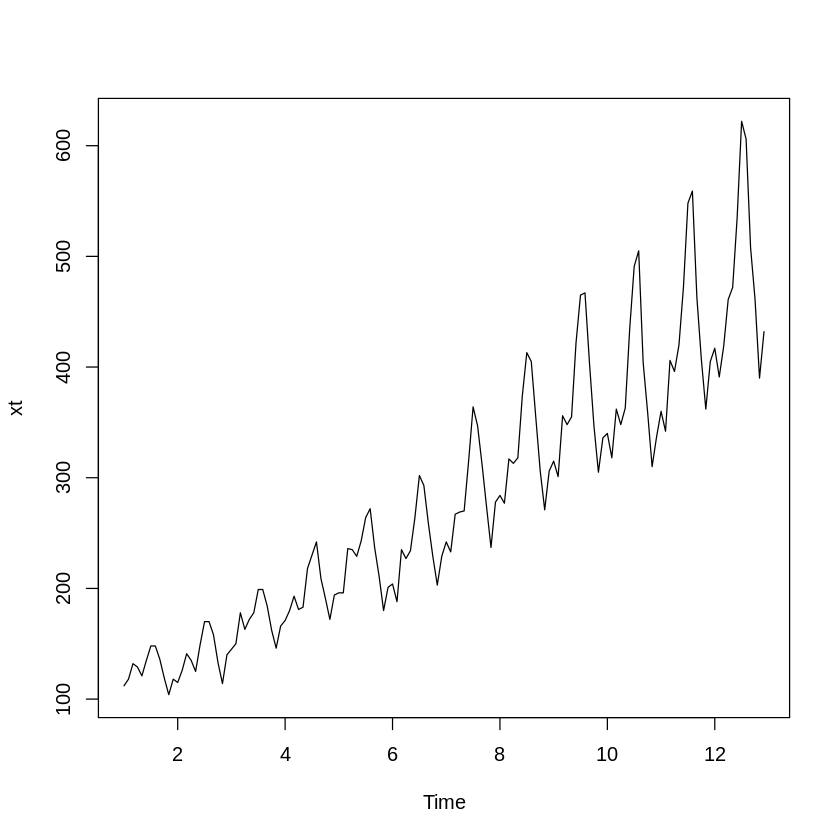

In [9]:
plot(xt)

En la gráfica anterior podemos constatar la <b>estacionalidad</b> y <b>tendencia</b> de los datos, así como un punto importante, que la <b>varianza no es constante</b>, para tratar esto se utilizará la siguiente transformación:
#### Método Box.Cox para transformar los datos

In [10]:
Box.Cox <- function(datos)
{
    library(MASS)
    n = length(datos)
    t = 1:n
    x = as.vector(datos)

    datos = data.frame(t,x)
    A = boxcox(x~t,data =datos,lambda = seq(-2, 2, 1/1000) )
    lambda = A$x[which.max(A$y)]
    A_2 = boxcox(x~t, data=datos, lambda = seq(lambda-0.1, lambda+0.1, 1/1000000))
    lambda_2 = A_2$x[which.max(A_2$y)]
    lambda_2
}

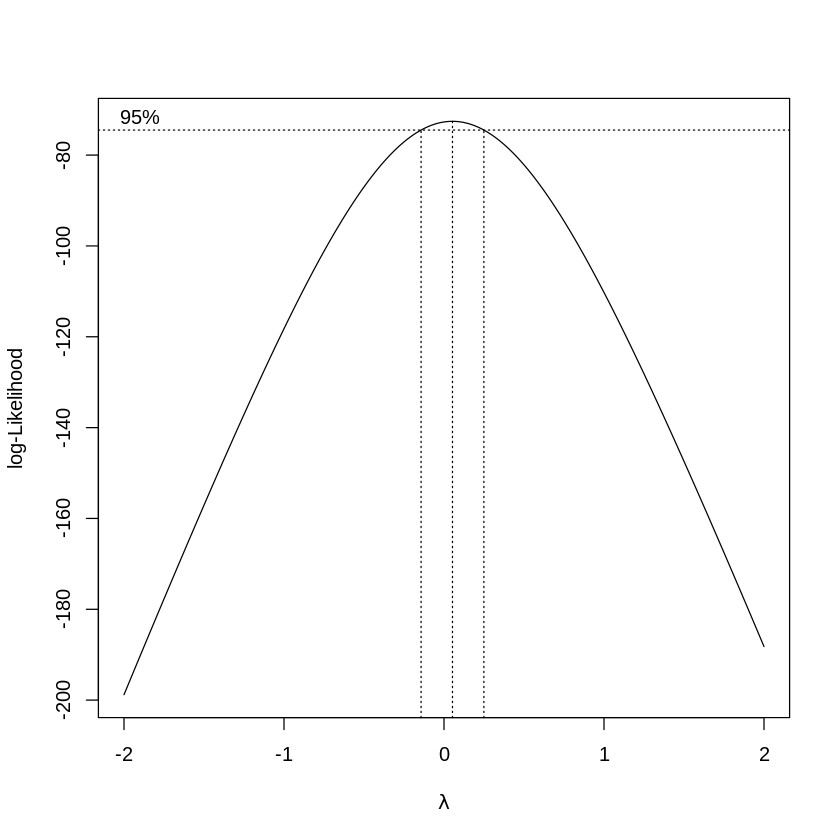

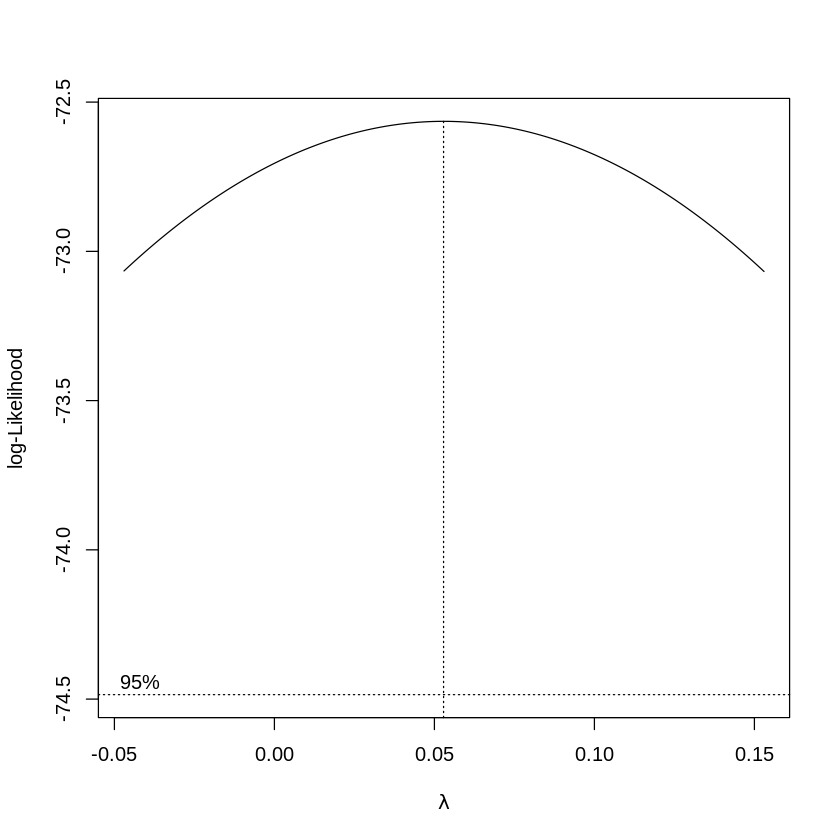

In [11]:
lambda = Box.Cox(x)

In [12]:
lambda

[1] 0.052867

Observando la gráfica de log verosimilitud, el rango de lambda abraza al CERO, por lo cual aplicaremos la función Logaritmo directamente.

In [13]:
#y = ( x ^ lambda - 1 ) / lambda
y = log(x)
y = ts(y, frequency = 12)

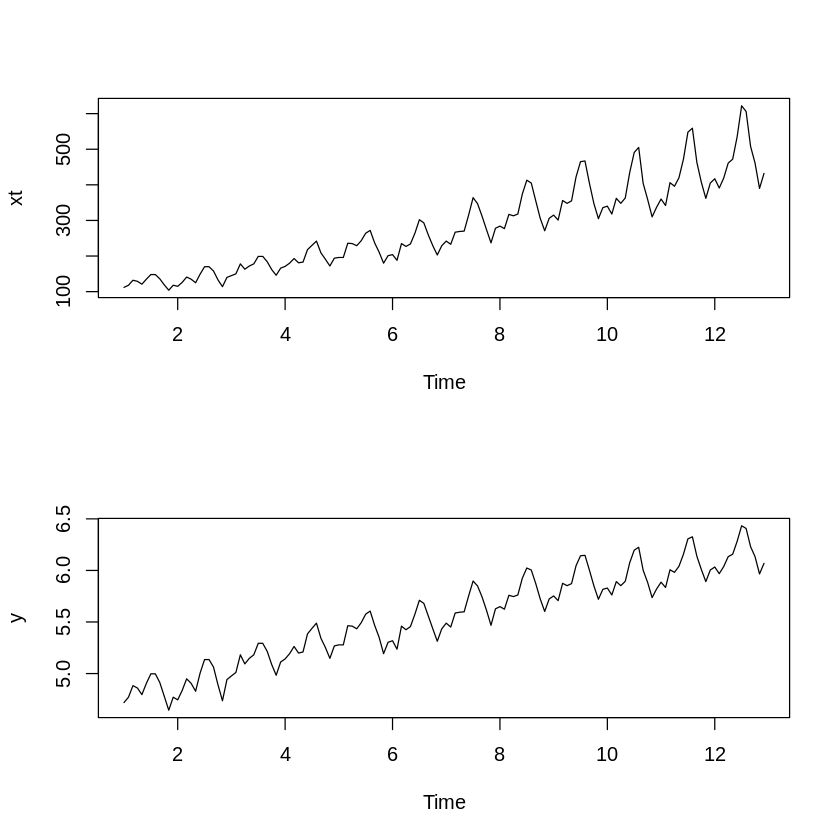

In [14]:
par(mfrow=c(2,1))
plot(xt)
plot(y)

Se muestran ambas gráficas, los datos sin tratar y los datos transformados y observamos una varianza más homogénea, lo cual nos indica que la transformación ayudó.

In [15]:
# Ver correlacion 
# Quitamos la tendencia con la diferencia
# acf para promedios móviles MA(q)
# pacf para la parte auto regresiva AR(p)

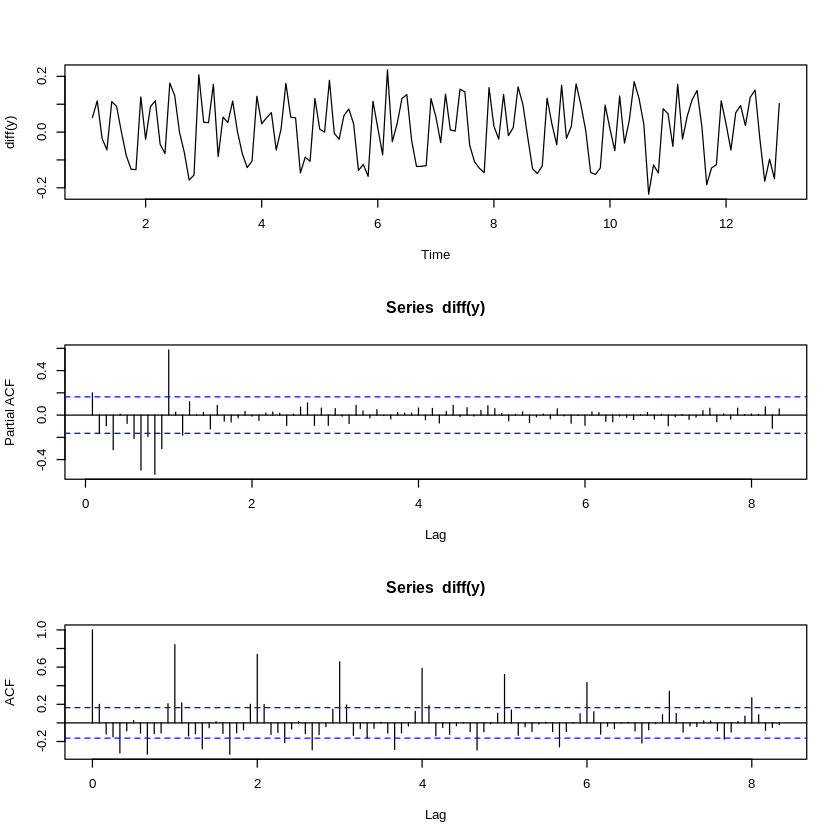

In [16]:
par(mfrow=c(3,1))
plot(diff(y), type="l")
pacf(diff(y),100)
acf(diff(y),100)

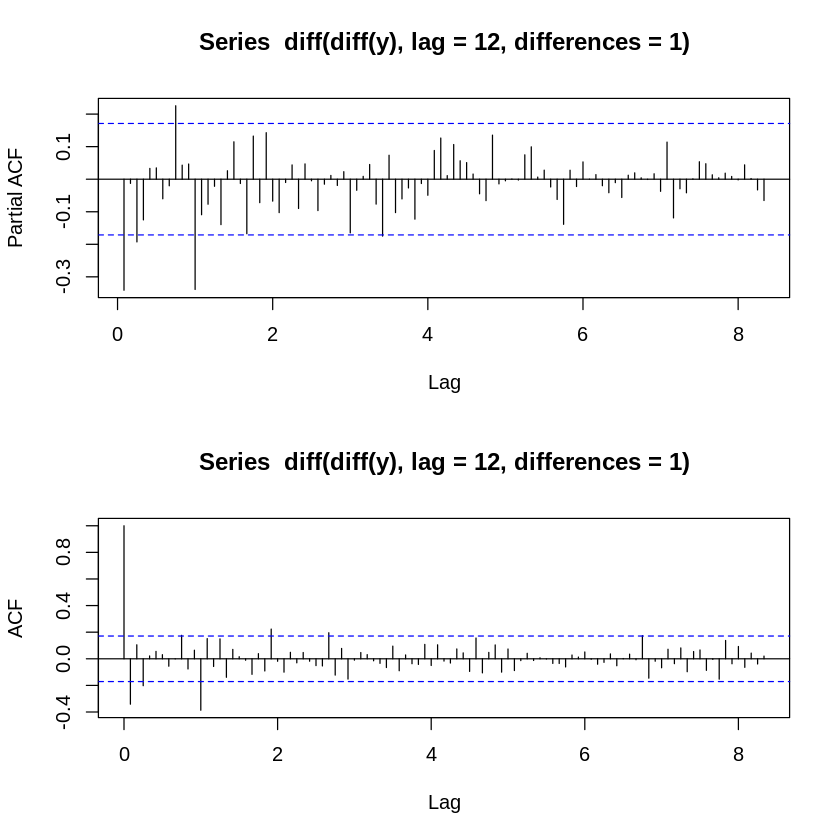

In [17]:
par(mfrow=c(2,1))
pacf(diff(diff(y), lag = 12, differences = 1),100)
acf(diff(diff(y), lag = 12, differences = 1),100)

#### Modelo

In [18]:
modelo = auto.arima(y,stepwise = FALSE, d=1, D=1, max.p=12, max.q=12,
     max.P=3, max.Q=3, max.order=5, max.d=2, max.D=2, 
     start.p=0, start.q=0, start.P=0, start.Q=0,trace=F)

In [19]:
modelo

Series: y 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001371:  log likelihood=244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

In [20]:
# Series: y 
# ARIMA(0,1,1)(0,1,1)[12] 
# 
# Coefficients:
#           ma1     sma1
#       -0.4018  -0.5569
# s.e.   0.0896   0.0731
# 
# sigma^2 estimated as 0.001371:  log likelihood=244.7
# AIC=-483.4   AICc=-483.21   BIC=-474.77

In [21]:
## AR: (1 − B^12)(1 − B) = 1 − B − B^12 + B^13
## MA: (1 − 0.4018 ∗ B)(1 − 0.5569 ∗ B^12) = 1 − 0.4018 ∗ B − 0.5569 ∗ B12 + 0.2237 ∗ B13

#### Residuales

In [22]:
e = as.numeric(residuals(modelo))

#### Validación de supuestos


	Shapiro-Wilk normality test

data:  sample(e, 50)
W = 0.93372, p-value = 0.007666



	One Sample t-test

data:  e
t = 0.19555, df = 143, p-value = 0.8452
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.005219710  0.006365835
sample estimates:
   mean of x 
0.0005730622 


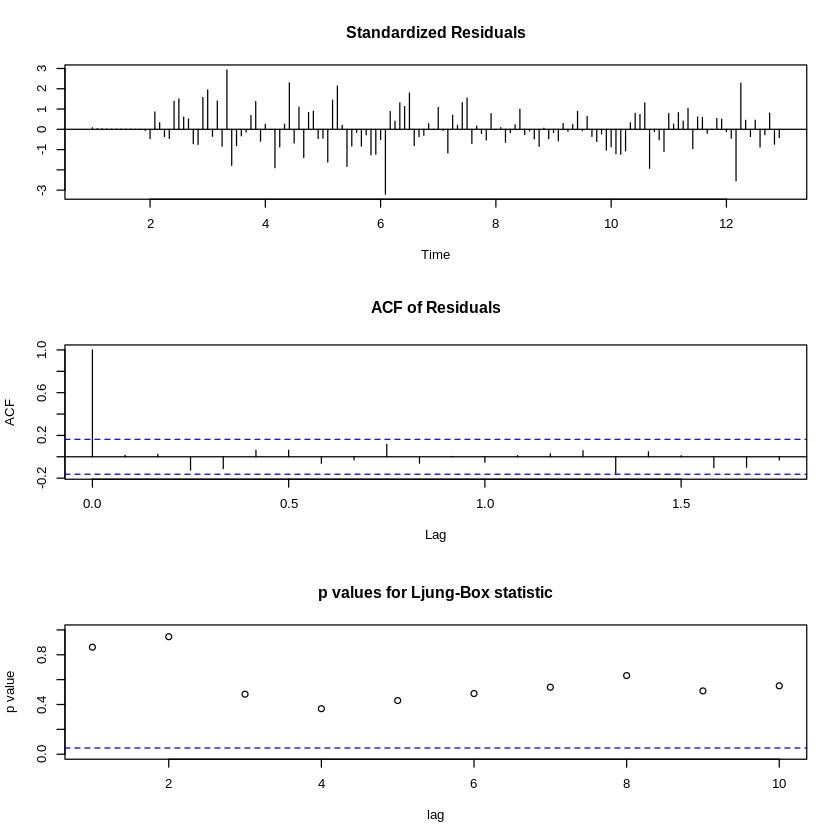

In [23]:
tsdiag(modelo)             # Para ver la no correlación de los errores || ninguna barra rebasa las bandas punteadas
shapiro.test(sample(e,50)) # Para ver la normalidad de los errores || no existe evidencia suficiente para rechazar H0; es decir, cumple con la normalidad
t.test(e)                  # Para ver la media cero de los errores || muy cercana a cero

#### Construcción del modelo

In [24]:
## AR: (1 − B^12)(1 − B) = 1 − B − B^12 + B^13
## MA: (1 − 0.4018 ∗ B)(1 − 0.5569 ∗ B^12) = 1 − 0.4018 ∗ B − 0.5569 ∗ B12 + 0.2237 ∗ B13

In [25]:
Y = as.numeric(y)
W = as.numeric(residuals(modelo))
n = length(Y)

In [26]:
length(Y)==length(W)

[1] TRUE

In [27]:
GenSim <- function(x,W,T)
{
    i = length(x)+1

    for(j in 1:T)
    {
        W[i]  = rnorm(1,0,sd=sqrt(0.001371)) 
        x[i]  = x[i-1]+x[i-12]-x[i-13]+W[i]-0.4018*W[i-1]-0.5569*W[i-12]+0.2237*W[i-13]
        i     = i+1
    }
    x
}

In [28]:
GenSim(Y,W,24)

[1] 4.718499 4.770685 4.882802 4.859812 4.795791 4.905275 4.997212 4.997212
  [9] 4.912655 4.779123 4.644391 4.770685 4.744932 4.836282 4.948760 4.905275
 [17] 4.828314 5.003946 5.135798 5.135798 5.062595 4.890349 4.736198 4.941642
 [25] 4.976734 5.010635 5.181784 5.093750 5.147494 5.181784 5.293305 5.293305
 [33] 5.214936 5.087596 4.983607 5.111988 5.141664 5.192957 5.262690 5.198497
 [41] 5.209486 5.384495 5.438079 5.488938 5.342334 5.252273 5.147494 5.267858
 [49] 5.278115 5.278115 5.463832 5.459586 5.433722 5.493061 5.575949 5.605802
 [57] 5.468060 5.351858 5.192957 5.303305 5.318120 5.236442 5.459586 5.424950
 [65] 5.455321 5.575949 5.710427 5.680173 5.556828 5.433722 5.313206 5.433722
 [73] 5.488938 5.451038 5.587249 5.594711 5.598422 5.752573 5.897154 5.849325
 [81] 5.743003 5.613128 5.468060 5.627621 5.648974 5.624018 5.758902 5.746203
 [89] 5.762051 5.924256 6.023448 6.003887 5.872118 5.723585 5.602119 5.723585
 [97] 5.752573 5.707110 5.874931 5.852202 5.872118 6.045005 6.142037 6.146329
[105] 6.001415 5.849325 5.720312 5.817111 5.828946 5.762051 5.891644 5.852202
[113] 5.894403 6.075346 6.196444 6.224558 6.001415 5.883322 5.736572 5.820083
[121] 5.886104 5.834811 6.006353 5.981414 6.040255 6.156979 6.306275 6.326149
[129] 6.137727 6.008813 5.891644 6.003887 6.033086 5.968708 6.037871 6.133398
[137] 6.156979 6.282267 6.432940 6.406880 6.230481 6.133398 5.966147 6.068426
[145] 6.116059 6.052094 6.106675 6.214491 6.181335 6.295602 6.458463 6.467406
[153] 6.256235 6.171521 5.951716 6.117128 6.151054 6.040757 6.119850 6.224862
[161] 6.222969 6.352857 6.536740 6.549655 6.338720 6.183502 6.034058 6.137143

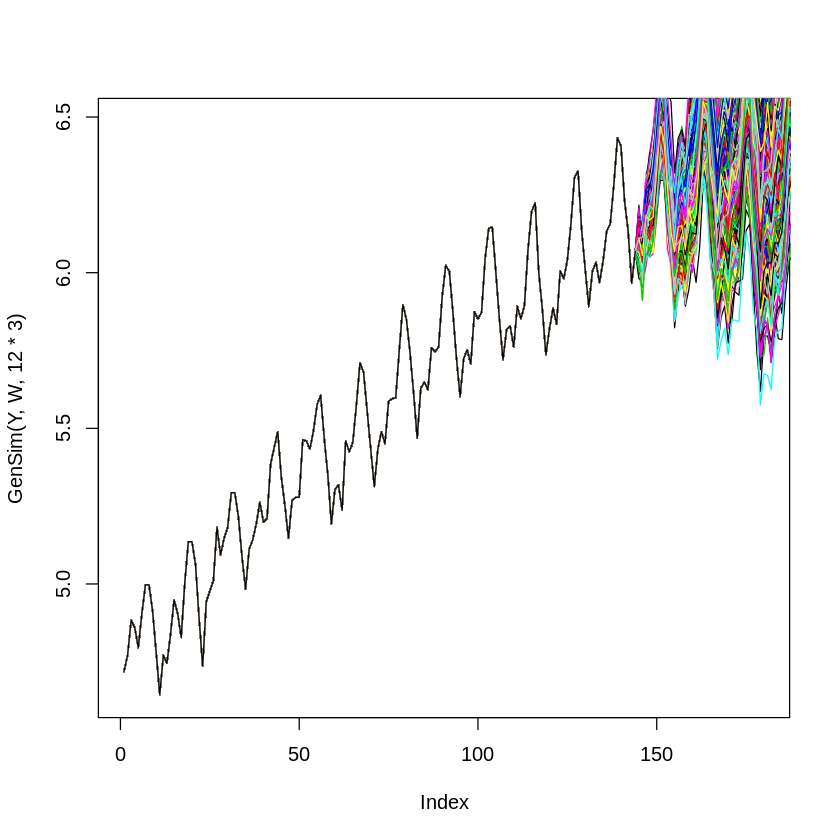

In [33]:
plot(GenSim(Y,W,12*3),type="l")
for(i in 1:1000) { lines(GenSim(Y,W,12*5),type="l",col=i) }
lines(Y[1:n],type="l")

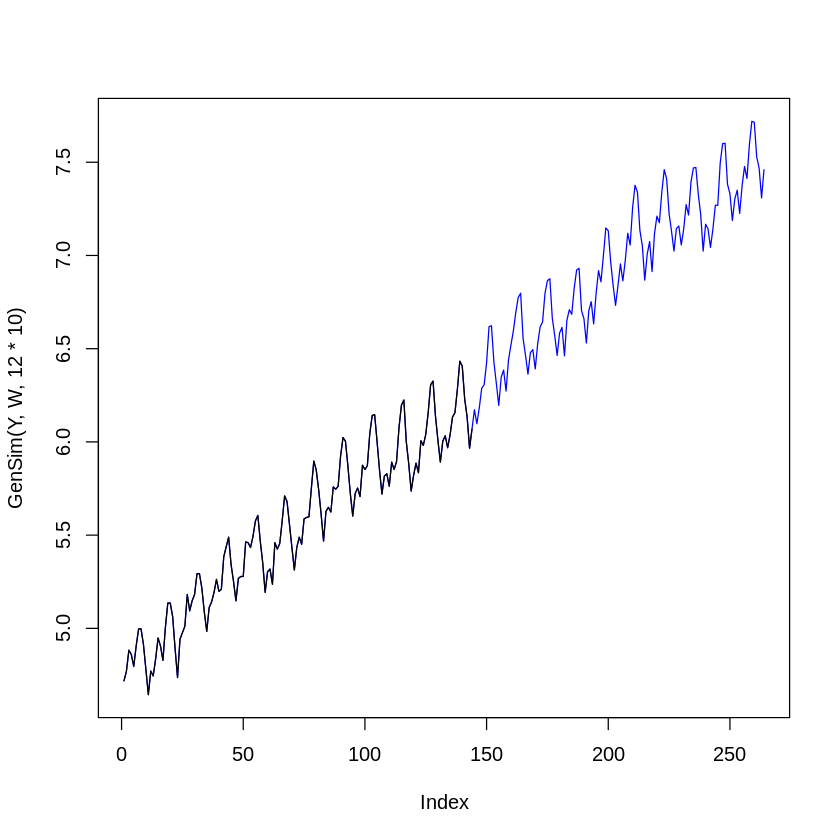

In [35]:
plot(GenSim(Y,W,12*10),type="l",col="blue")
lines(Y[1:n],type="l",col="black")

In [30]:
Y   = as.numeric(y)
W   = as.numeric(residuals(modelo))
n   = length(Y)
T   = 24
M   = 500
Sim = matrix(0,M,n+T)

In [130]:
for(i in 1:M)
{
    Sim[i,] = GenSim(Y,W,T)
    #print(100*i/M)
}

In [36]:
SimRev = exp(Sim)

In [37]:
write.csv(SimRev,"AirPassengers.csv")

### Visualización de los intervalos de confianza

In [131]:
datos_sim <- GenSim(Y,W,24)

In [132]:
ts_datos_sim <- ts(datos_sim, frequency = 12)

In [133]:
trans_datos_rev = exp(ts_datos_sim)

In [134]:
(fitT <- arima(trans_datos_rev, order=c(0, 1, 1), list(order=c(0, 1, 1), period = 12)))


Call:
arima(x = trans_datos_rev, order = c(0, 1, 1), seasonal = list(order = c(0, 
    1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.2120  -0.1764
s.e.   0.0798   0.0720

sigma^2 estimated as 203.5:  log likelihood = -632.11,  aic = 1270.22

In [135]:
forecastT <- predict(fitT, n.ahead = 24)

In [136]:
int_alto_T <- forecastT$pred + 2*forecastT$se
int_bajo_T <- forecastT$pred - 2*forecastT$se

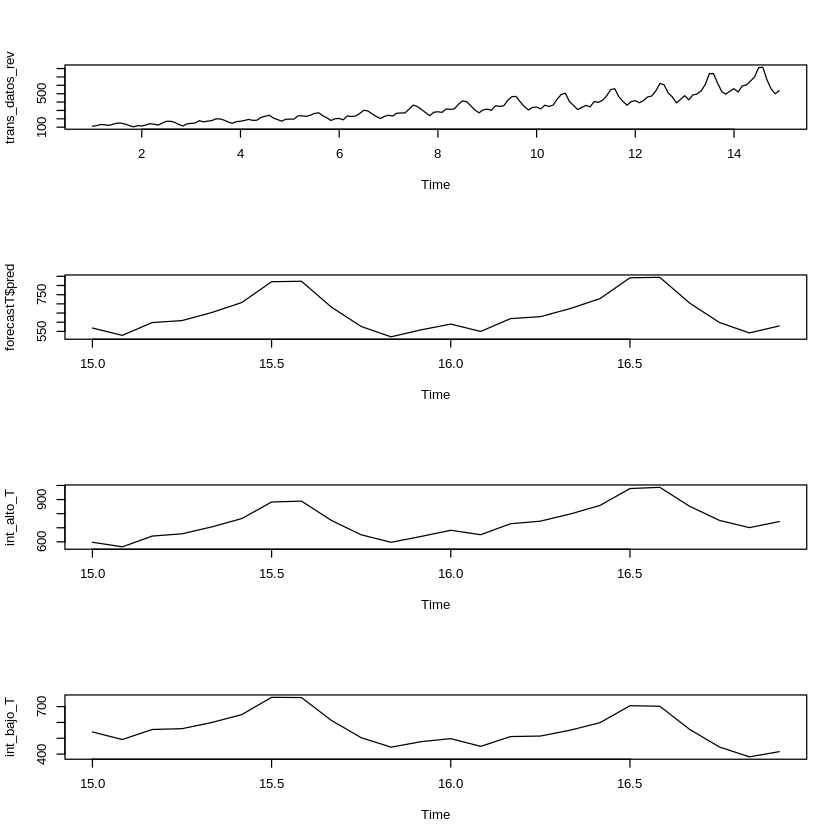

In [137]:
par(mfrow=c(4,1))
plot(trans_datos_rev)
plot(forecastT$pred)
plot(int_alto_T)
plot(int_bajo_T)

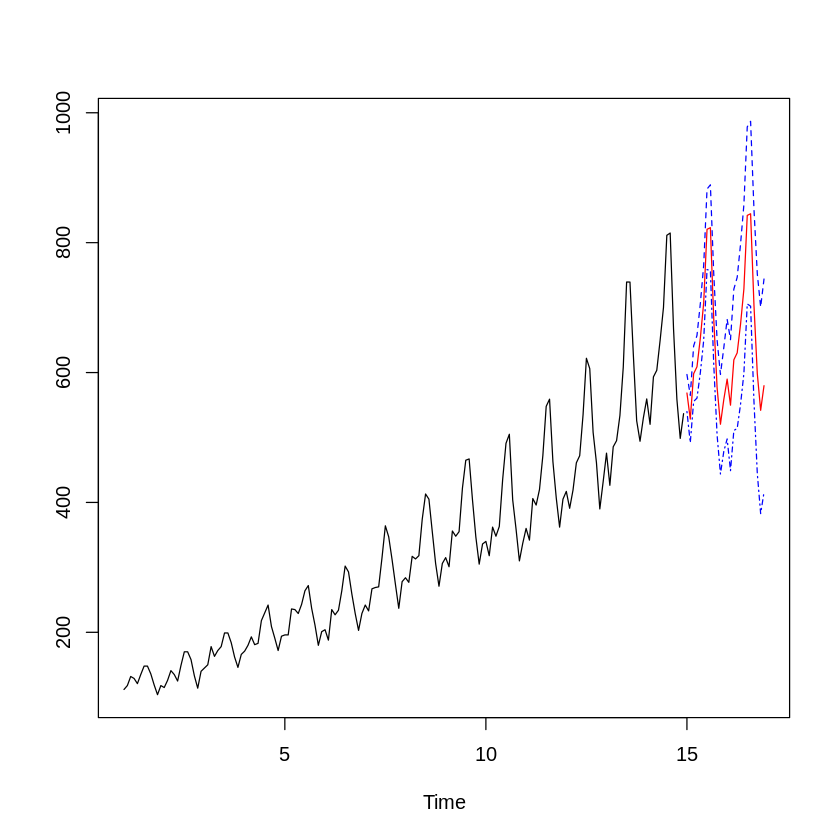

In [139]:
ts.plot(trans_datos_rev, forecastT$pred, int_alto_T, int_bajo_T, col=c(1, 2, 4,4), lty=c(1, 1, 2,4))